In [1]:
using Distributions
using Plots

using StatsBase
using DataStructures
using Parameters
using LinearAlgebra
using Random

# Notation

The following is the notation we establish that we use in the expositions (the Markdown cells) below. 
* $N$ = Number of Dice
* $F$ = Number of faces on each dice. 
* "Payoff" is the amount the House pays the player after a round, _including_ the "बोट" i.e if you play Rs. 1 on पान and the dice has two पानs, then the House will return your initial Rs. 1 बोट that you played and then an addition Rs. 2 in winnings for a payoff of Rs. 3. If you played Rs. 1 on सुरत and there were no dice showing सुरत, then the House returns nothing to you and also takes your Rs. 1 बोट so your payoff is -Rs.1. By this definition, a payoff is NOT profit - only a payoff of > 1 is profit.

(Note: The Payoff term above is confusing and we may have to revisit it.)

In [62]:
function payoff(num_succs)
    """ Returns the amount returned by the House when there are ``num_succs" dice
        that are of the player's chosen symbol. 
    
        Note 1 : Maybe payoff is not the best name? Maybe this should be called "return". Payoff might
                 imply net win. 
        Note 2 : This function should validate the range of values ``num_succs" can be ([0-6] for normal langur burja.)
    """
    if num_succs <= 1
        -1
    else
        num_succs + 1
    end
end

function expected_payoff(num_dice, num_faces)
    """ Returns the expected return 
    """    
    succ = 1/num_faces
    fail = 1 - succ
    n = num_dice # to make the equation easy to read
    payoff_sum = 0
    
    for k = 0:min(num_dice, num_faces)
        # k is the number of dice that show the symbol player has chosen
        payoff_sum += payoff(k) * binomial(n ,k) * succ^k * fail^(n-k)
    end
    payoff_sum
end

function langur_burja()
    """ Returns the expected return for the normal langur burja (Hard-coded)
        (where normal means that there are 6 dices with 6 faces each.)
    """
    n = 6 # num_dice
    succ = 1/n
    fail = 1 - succ
    payoff_sum = 0
    
    for k = 0:n 
        # k is the number of dice that show the symbol player has chosen
        payoff_sum += payoff(k) * binomial(n ,k) * succ^k * fail^(n-k)
    end
    payoff_sum
end
     
langur_burja()

0.124571330589849

## Case: N = F

This figure shows that increasing the number of dice doesn't really improve the expected return in the case where the number of dice is the same as the number of faces in the dice - for eg. when N=8 each of the 8 dice have 8 faces. 

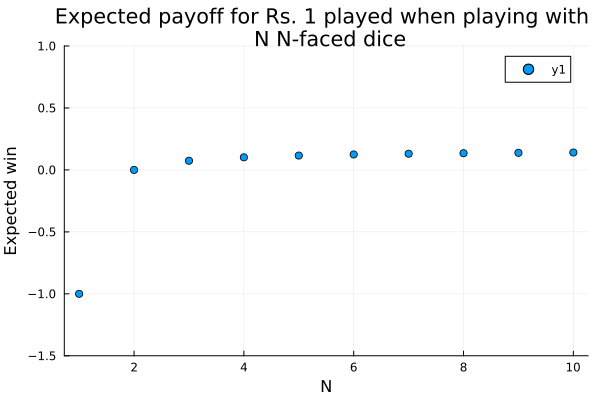

In [58]:
returns = []
for num_dice = 1:10
    push!(returns, expected_payoff(num_dice, num_dice))
end

p = plot()
plot!(1:10, returns, 
      seriestype=:scatter,
      title="Expected payoff for Rs. 1 played when playing with \n N N-faced dice", 
      ylabel="Expected win",
      xlabel="N",
      ylim=(-1.5, 1)
)

## Case: Varying N, F = 6

With increasing $N$ we observe that the expected return on your Rs. 1 played increases. 

***Interestingly, we notice that $N$=6 is the lowest $N$ where the player has a positive expected payoff.*** 
Why this may be interesting: To have a positive expected payoff means that you are more likely than not to get back some amount from the House after each round. It will be a lower amount than your बोट but it is possible that the act of receiving money is addictive therefore encouraging the players to stay. A negative expected payoff means that you are more likely to not get anything back from the House so that may be discouraging - so the fact that $N=6$ is the first time this is positive feels like too much to be a coincidence.

Why I might be wrong - I am not fully convinced by the above argument and need to think more. Your expected payoff might be positive but in practice it is not as if you put Rs1 as बोट and then get 12 paisa back - I think the validation comes from getting physical money back and it feels like in some way that should depend on the discrete denominations used???

Importantly, I want to note that even though this is the first time the expected payoff is positive the player is still incurring a loss. Recall that our definition of payoff is how much the House returns to you after a round - and especially, payoff is not profit from our definition. Only a payoff of > 1 is profit.

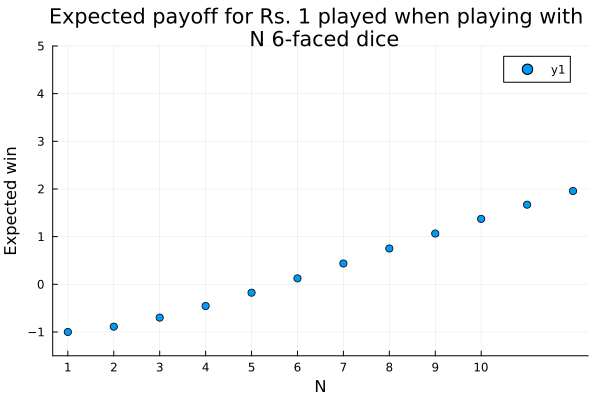

In [69]:
num_faces = 6
Ns = 1:12
returns = []
for num_dice in Ns
    push!(returns, expected_payoff(num_dice, num_faces))
end

p = plot()
plot!(1:12, returns, 
      seriestype=:scatter,
      title="Expected payoff for Rs. 1 played when playing with \n N 6-faced dice", 
      ylabel="Expected win",
      xlabel="N",
      ylim=(-1.5, 5),
      xticks=1:10
)

In [67]:
returns

12-element Vector{Any}:
 -1.0
 -0.888888888888889
 -0.6990740740740742
 -0.45524691358024705
 -0.17605452674897132
  0.124571330589849
  0.43633187585733896
  0.7516747875704922
  1.0650747948737491
  1.372461522951278
  1.6707774084032265
  1.9576486493503047